<a href="https://colab.research.google.com/github/AmitRLohiya/DeepLearning/blob/main/House_Loan_Data_Analysis/House_Loan_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 50)

In [2]:
#Reading Data from the CSV
loan_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/loan_data.csv")

In [3]:
#Glance at Data
loan_data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Number of Rows and Columns

print("Rows in Data {}".format(loan_data.shape[0]))
print("Columns in Data {}".format(loan_data.shape[1]))

Rows in Data 307511
Columns in Data 122


In [5]:
#Data in Categorical Columns
#To have a look at inconsistency in the data

cat_columns = list(loan_data.select_dtypes(include = np.object).columns)

for col in cat_columns:
  print("\nColumn Name - \"{}\"".format(col))
  print("Unique Values \n {}".format(loan_data[col].unique()))

#NAME_FAMILY_STATUS - Has Unknown values wich refer to Nulls



Column Name - "NAME_CONTRACT_TYPE"
Unique Values 
 ['Cash loans' 'Revolving loans']

Column Name - "CODE_GENDER"
Unique Values 
 ['M' 'F' 'XNA']

Column Name - "FLAG_OWN_CAR"
Unique Values 
 ['N' 'Y']

Column Name - "FLAG_OWN_REALTY"
Unique Values 
 ['Y' 'N']

Column Name - "NAME_TYPE_SUITE"
Unique Values 
 ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

Column Name - "NAME_INCOME_TYPE"
Unique Values 
 ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

Column Name - "NAME_EDUCATION_TYPE"
Unique Values 
 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Column Name - "NAME_FAMILY_STATUS"
Unique Values 
 ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

Column Name - "NAME_HOUSING_TYPE"
Unique Values 
 ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartm

In [6]:
#Look at Null Values in the Data
null_df = pd.DataFrame(loan_data.isnull().sum().sort_values(ascending = False), columns = ['Null_Count'])
null_df['Percent_Of_Nulls'] = null_df['Null_Count'].apply(lambda x: (x/loan_data.shape[0])*100)

In [7]:
null_df.dtypes

Null_Count            int64
Percent_Of_Nulls    float64
dtype: object

In [8]:
high_nulls = list(null_df[null_df['Percent_Of_Nulls'] > 50.0].index)
print("Total Number of Columns with Null Values Greater than 50 percent - {} Columns".format(len(high_nulls)))
high_nulls

Total Number of Columns with Null Values Greater than 50 percent - 41 Columns


['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MODE',
 'ELEVATORS_MODE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'ENTRANCES_AVG',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'LIVINGAREA_AVG',
 'HOUSETYPE_MODE']

In [9]:
#Dropping the Columns with Null Values more than 50%
loan_data = loan_data.drop(high_nulls, axis = 1)
print('Shape of Data After Dropping Null Columns {}'.format(loan_data.shape))

Shape of Data After Dropping Null Columns (307511, 81)


In [10]:
#Percent of Default to Payers
default_to_Payer = pd.DataFrame(loan_data.TARGET.value_counts())
default_to_Payer['Percents'] = default_to_Payer.TARGET.apply(lambda x: (x/loan_data.shape[0])*100)
default_to_Payer

,TARGET,Percents
0,282686,91.927118
1,24825,8.072882


Data is Highly Imbalanced, We will use SMOTE Algorithm to Balance Out the Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


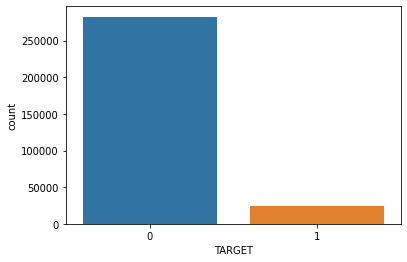

In [11]:
#Count Plot for Default to Payers
#91% Payers and 8% Defaulters
sns.countplot(loan_data.TARGET)

In [12]:
#Treating Null Values
pd.set_option('display.max_rows', 100)
loan_data.isnull().sum().sort_values(ascending = False)

FLOORSMAX_AVG                   153020
FLOORSMAX_MEDI                  153020
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MEDI    150007
YEARS_BEGINEXPLUATATION_MODE    150007
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OCCUPATION_TYPE                  96391
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_YEAR       41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
NAME_TYPE_SUITE                   1292
DEF_60_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       660
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
DAYS_LAST_PHONE_CHANGE   

In [13]:
#Segregating Categorical Data and Numerical Data
categorical_data = loan_data.select_dtypes(include=np.object)
categorical_data.shape

(307511, 13)

In [14]:
categorical_data.isnull().sum().sort_values(ascending = False)
orignal = categorical_data
mask = categorical_data.isnull()

In [15]:
mask.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True


In [16]:
#Encoding the Categorical Columns 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# categorical_data.fillna(value = 'unknown', inplace = True)
categoricaldf = categorical_data.astype('str').apply(le.fit_transform)

In [17]:
#Replacing Encoded Unknown value back to Nan
categoricaldf = categoricaldf.where(~mask, orignal)

In [18]:
#We have Null Values but now these are encoded as numeric once
categoricaldf.isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
EMERGENCYSTATE_MODE           145755
dtype: int64

In [19]:
obj_cols = list(categoricaldf.select_dtypes(include = np.object).columns)
obj_cols
for col in obj_cols:

  categoricaldf[col] = pd.to_numeric(categoricaldf[col], errors = 'coerce')

In [20]:
categoricaldf.dtypes

NAME_CONTRACT_TYPE              int64
CODE_GENDER                     int64
FLAG_OWN_CAR                    int64
FLAG_OWN_REALTY                 int64
NAME_TYPE_SUITE               float64
NAME_INCOME_TYPE                int64
NAME_EDUCATION_TYPE             int64
NAME_FAMILY_STATUS              int64
NAME_HOUSING_TYPE               int64
OCCUPATION_TYPE               float64
WEEKDAY_APPR_PROCESS_START      int64
ORGANIZATION_TYPE               int64
EMERGENCYSTATE_MODE           float64
dtype: object

In [21]:
#Using Fancy Impute to Impute the Missing Values in the Categorical Data
# !pip install fancyimpute
# from fancyimpute import IterativeImputer

In [22]:
from fancyimpute import IterativeImputer

mice_impute = IterativeImputer()
cols = list(categoricaldf.columns)
categoricaldf = mice_impute.fit_transform(categoricaldf)
categoricaldf = pd.DataFrame(categoricaldf, columns = cols)

In [23]:
categoricaldf

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
0,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,8.000000,6.0,5.0,0.000000
1,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0,3.000000,1.0,39.0,0.000000
2,1.0,1.0,1.0,1.0,6.0,7.0,4.0,3.0,1.0,8.000000,1.0,11.0,0.016806
3,0.0,0.0,0.0,1.0,6.0,7.0,4.0,0.0,1.0,8.000000,6.0,5.0,0.017274
4,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,3.000000,4.0,37.0,0.017478
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,1.0,0.0,0.0,6.0,7.0,4.0,2.0,5.0,14.000000,4.0,43.0,0.000000
307507,0.0,0.0,0.0,1.0,6.0,3.0,4.0,5.0,1.0,9.065501,1.0,57.0,0.000000
307508,0.0,0.0,0.0,1.0,6.0,7.0,1.0,2.0,1.0,10.000000,4.0,39.0,0.000000
307509,0.0,0.0,0.0,1.0,6.0,1.0,4.0,1.0,1.0,8.000000,6.0,3.0,0.000000


In [24]:
categoricaldf.EMERGENCYSTATE_MODE.value_counts()

0.000000    159428
1.000000      2328
0.015458       874
0.015449       851
0.015468       822
             ...  
0.013350         1
0.019292         1
0.019160         1
0.018069         1
0.020599         1
Name: EMERGENCYSTATE_MODE, Length: 72452, dtype: int64

In [25]:
#Treating Numeric Values
numeric_data = loan_data.select_dtypes(include = np.number)
numeric_data.shape

(307511, 68)

In [26]:
numeric_data.isnull().sum().sort_values(ascending = False)

FLOORSMAX_MODE                  153020
FLOORSMAX_AVG                   153020
FLOORSMAX_MEDI                  153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BEGINEXPLUATATION_MEDI    150007
TOTALAREA_MODE                  148431
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
DEF_60_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       660
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
DAYS_LAST_PHONE_CHANGE               1
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
HOUR_APPR_PROCESS_START  

In [27]:
numeric_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0

In [28]:
numericdf = mice_impute.fit_transform(numeric_data)

In [29]:
numericdf = pd.DataFrame(numericdf, columns = list(numeric_data.columns))

In [30]:
numericdf.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
HOUR_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
EXT_SOURCE_2                    0
EXT_SOURCE_3  

In [31]:
finaldf = pd.concat([categoricaldf, numericdf], axis = 1)

In [32]:
finaldf.shape

(307511, 81)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


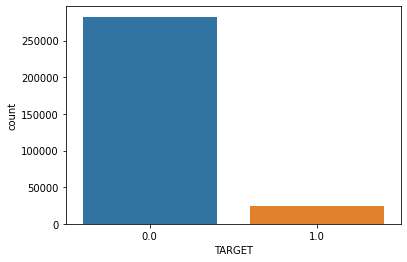

In [33]:
#Having a Look at the Target Column
sns.countplot(finaldf.TARGET)

#Data is Highly Imbalanced hence we will have to use OverSampling or UnderSampling to Balance out the data

In [34]:
finaldf.TARGET.value_counts()

0.0    282686
1.0     24825
Name: TARGET, dtype: int64

In [35]:
X_train = finaldf.drop('TARGET', axis = 1)
y_train = finaldf.TARGET

In [36]:
#Some issues with the SMOTE Implementation

# print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
# print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
 
# # import SMOTE module from imblearn library
# # pip install imblearn (if you don't have imblearn in your system)
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 2)
# X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
 
# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
 
# print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 24825
Before OverSampling, counts of label '0': 282686 



ImportError: ignored

#Using OverSampling Technique to Balance Out the Data

In [55]:
X_train_1 = finaldf[finaldf['TARGET']==1.0]
X_train_1.shape

(0, 81)

In [42]:
finaldf.TARGET.value_counts()[0]

282686

In [43]:
testdf = X_train_1.sample(finaldf.TARGET.value_counts()[0], replace = True)
testdf.shape

(282686, 81)

In [46]:
finaldf = finaldf[finaldf['TARGET']==0.0]
df = pd.concat([finaldf, testdf], axis = 0)
df.shape

(565372, 81)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


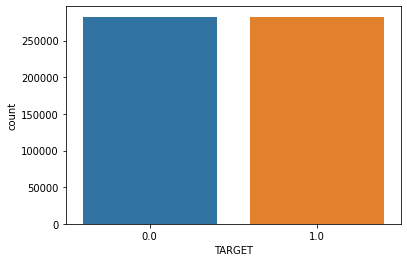

In [47]:
sns.countplot(df.TARGET)
#Now we have balanced the data

In [48]:
df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,...,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0,3.0,1.0,39.0,0.000000,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.622246,0.528153,0.985100,0.291700,0.985100,0.291700,0.985100,0.291700,0.071400,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.0,1.0,1.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,1.0,11.0,0.016806,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.555912,0.729567,0.977625,0.225802,0.976929,0.222619,0.977820,0.225539,0.105634,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,1.0,6.0,7.0,4.0,0.0,1.0,8.0,6.0,5.0,0.017274,100006.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,...,0.650442,0.558751,0.977661,0.225366,0.976859,0.223858,0.977802,0.225446,0.104598,2.0,0.0,2.0,0.0,-617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006684,0.007227,0.040274,0.241644,0.266485,2.054643
4,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,3.0,4.0,37.0,0.017478,100007.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,11.0,0.0,0.0,0.0,0.0,1.0,...,0.322738,0.566150,0.977694,0.225914,0.977044,0.221700,0.977670,0.225623,0.099314,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,1.0,0.0,1.0,5.0,4.0,4.0,1.0,1.0,8.0,6.0,33.0,0.014989,100008.0,0.0,0.0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941.0,-1588.0,-4970.0,-477.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,16.0,0.0,0.0,0.0,0.0,0.0,...,0.354225,0.621226,0.977477,0.227003,0.976970,0.221659,0.977706,0.226193,0.102828,0.0,0.0,0.0,0.0,-2536.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000


In [49]:
#Sacling the data 
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.9799371 ],
       [ 1.        ,  1.        ,  1.        , ...,  0.        ,
         0.        , -0.9799371 ],
       [ 0.        ,  0.        ,  0.        , ...,  1.58300215,
         1.06035204,  0.04738457],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.38829746,
         1.07902125,  0.04304999],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.0200629 ],
       [ 1.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.0200629 ]])

In [50]:
scaled_df = pd.DataFrame(scaled_df, columns = list(df.columns))
scaled_df.head(2)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,...,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,-1.0,-5.0,-0.75,-3.0,0.0,0.0,-1.555314,-0.75,0.162162,-0.334521,-1.000550,-0.5,0.0,1.40,1.555645,0.629315,1.556701,-0.911861,-0.238455,-0.030971,0.590563,1.029599,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,-1.0,-0.25,0.0,0.0,0.0,0.0,0.0,...,0.321835,0.271346,2.098229,1.116729,2.142578,1.215395,2.112279,1.123716,-0.687855,0.5,0.0,0.5,0.0,-0.121990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.979937
1,1.0,1.0,1.0,0.0,0.0,0.00,0.0,2.0,0.0,0.000000,-0.75,-0.594595,0.647418,-1.000544,-0.5,0.0,-0.85,-0.735505,-1.078864,-0.721649,-0.523992,-0.557655,0.420929,0.005708,0.190333,0.0,0.0,1.0,0.0,1.0,0.0,-1.0,0.0,0.0,-0.75,0.0,0.0,0.0,0.0,0.0,...,0.120126,1.029964,-0.047276,0.013347,-0.081034,0.004774,0.013151,0.006680,0.304891,0.0,0.0,0.0,0.0,-0.111557,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.979937


In [51]:
scaled_df = scaled_df.drop('TARGET', axis=1)

In [59]:
df.reset_index(inplace=True)
scaled_df['TARGET'] = df['TARGET']

In [60]:
X = scaled_df.drop('TARGET', axis=1)
y = scaled_df['TARGET']
#Now we have the data Cleaned and preprocessed
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [62]:
X_train.shape

(395760, 80)

Creating Model

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(80, input_dim = (80), activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [70]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [71]:
nn = model.fit(X_train, y_train, epochs = 50, batch_size=500)

Epoch 1/50
792/792 [==============================] - 4s 5ms/step - loss: 0.6053 - accuracy: 0.6776
Epoch 2/50
792/792 [==============================] - 4s 4ms/step - loss: 0.5784 - accuracy: 0.7009
Epoch 3/50
792/792 [==============================] - 3s 4ms/step - loss: 0.5381 - accuracy: 0.7244
Epoch 4/50
792/792 [==============================] - 3s 4ms/step - loss: 0.5063 - accuracy: 0.7384
Epoch 5/50
792/792 [==============================] - 3s 4ms/step - loss: 0.4982 - accuracy: 0.7435
Epoch 6/50
792/792 [==============================] - 3s 4ms/step - loss: 0.4919 - accuracy: 0.7482
Epoch 7/50
792/792 [==============================] - 4s 4ms/step - loss: 0.4854 - accuracy: 0.7519
Epoch 8/50
792/792 [==============================] - 4s 4ms/step - loss: 0.4796 - accuracy: 0.7564
Epoch 9/50
792/792 [==============================] - 4s 5ms/step - loss: 0.4758 - accuracy: 0.7591
Epoch 10/50
792/792 [==============================] - 4s 4ms/step - loss: 0.4714 - accuracy: 0.7616

In [72]:
model.evaluate(X_test, y_test)

5301/5301 [==============================] - 7s 1ms/step - loss: 0.4022 - accuracy: 0.8078


[0.40215420722961426, 0.8078379034996033]